In [1]:
import pandas as pd
from sklearn import metrics
import lightgbm as lgb
import numpy as np

In [2]:
df = pd.read_csv("../data/V2_TEST_DATA_ENCODED_TRANSFORMED.csv")


In [9]:
df.head()

,Unnamed: 0,CrimeDate,Description,District,Neighborhood,Premise,Month,Hour,Outside,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Holiday,Weekend
0,1,2018-12-30,7,3,118,78,12,0,1,0,0,0,1,0,0,1
1,2,2018-12-29,4,0,248,69,12,0,0,0,0,0,1,0,0,1
2,3,2018-12-29,12,2,207,38,12,0,0,0,0,0,1,0,0,1
3,4,2018-12-28,4,6,216,50,12,0,0,0,0,0,1,0,0,0
4,5,2018-12-28,3,4,136,78,12,0,1,0,0,0,1,0,0,0


In [3]:
df = df.drop(columns=["Unnamed: 0","CrimeDate","District"])

In [11]:
X_test = df.drop(columns = ['Description'])
Y_test = df['Description']

In [12]:
MODEL = lgb.Booster(model_file='BASE_MODEL_V2.txt')

In [13]:
prediction_probs = MODEL.predict(X_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

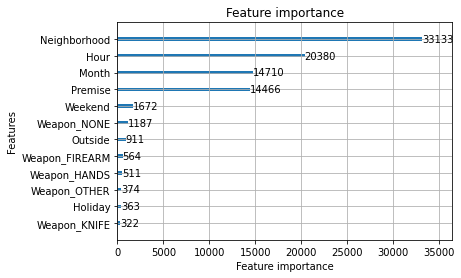

In [14]:
lgb.plot_importance(MODEL)

In [15]:
predictions = []

In [16]:
for i in range(len(prediction_probs)):
    predictions.append(np.where(prediction_probs[i]==np.max(prediction_probs[i]))[0][0])


In [17]:
metrics.accuracy_score(predictions,Y_test)

0.464356145660451

In [18]:
metrics.recall_score(predictions,Y_test,average="weighted",zero_division=0)

0.464356145660451

In [19]:
metrics.precision_score(predictions,Y_test,average="weighted",zero_division=0)

0.6073507757752115

In [20]:
metrics.f1_score(predictions,Y_test,average="weighted",zero_division=0)

0.5120674541326085